In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [6]:
#!uv add seaborn
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('dam-features.csv')

In [8]:
df

,DATE,occ,l90,l91,l92,l93,l94,l95,l96,l97,...,mx180,mn120,mn150,mn180,mean120,mean150,mean180,med120,med150,med180
0,2021-04-07,76.53,19.35,19.35,19.47,19.62,19.79,19.91,20.02,20.13,...,34.60,19.35,19.35,19.35,21.098710,23.479016,26.091429,21.53,22.66,26.07
1,2021-04-06,75.88,19.35,19.47,19.62,19.79,19.91,20.02,20.13,20.29,...,34.72,19.35,19.35,19.35,21.212581,23.635246,26.260330,21.57,22.88,26.30
2,2021-04-05,74.70,19.47,19.62,19.79,19.91,20.02,20.13,20.29,20.49,...,34.73,19.47,19.47,19.47,21.332258,23.794754,26.429341,21.65,23.06,26.34
3,2021-04-04,73.76,19.62,19.79,19.91,20.02,20.13,20.29,20.49,20.70,...,35.05,19.62,19.62,19.62,21.455806,23.955410,26.600549,21.66,23.30,26.43
4,2021-04-03,73.66,19.79,19.91,20.02,20.13,20.29,20.49,20.70,20.93,...,35.36,19.79,19.79,19.79,21.582258,24.115738,26.773516,21.70,23.54,26.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5936,2005-01-05,44.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5937,2005-01-04,44.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5938,2005-01-03,44.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5939,2005-01-02,44.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df = df.dropna().drop('DATE', axis=1)

In [10]:
y = df.occ
X = df.drop('occ',axis=1).values

In [11]:
rf = RandomForestRegressor(criterion='absolute_error')

In [12]:
# CAUTION: Note that this form of CV is not "good" for time series

cv_scores = cross_val_score(rf, X, y, cv=5, scoring="neg_mean_absolute_error")  # MAE Score

In [13]:
print("Cross-validation MAE scores:", cv_scores)
print("Mean MAE Score:", cv_scores.mean())

Cross-validation MAE scores: [-18.25383309 -13.76968915 -13.66583155 -15.1320237  -20.59743989]
Mean MAE Score: -16.283763475158402


In [14]:
y_pred = rf.fit(X,y).predict(X)

In [21]:
feature_names = df.drop('occ',axis=1).columns

importances = rf.feature_importances_

# Convert to DataFrame for better visualization
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})

importance_df.sort_values(by="Importance", ascending=False)

,Feature,Importance
0,l90,0.285009
10,l_m6,0.174958
13,mx180,0.079112
16,mn180,0.074984
9,l_m5,0.056098
15,mn150,0.039229
22,med180,0.037318
12,mx150,0.034100
1,l91,0.020963
20,med120,0.020339


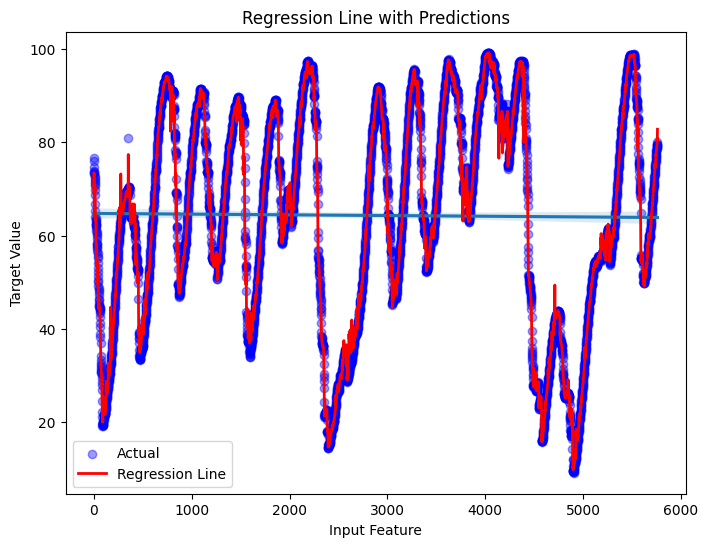

In [15]:
plt.figure(figsize=(8, 6))
sns.regplot(x=list(range(len(y))), y=y, scatter_kws={'color': 'blue', 'alpha': 0.4}, label="Actual")
plt.plot(list(range(len(y))), y_pred, color='red', linewidth=2, label="Regression Line")
plt.xlabel("Input Feature")
plt.ylabel("Target Value")
plt.title("Regression Line with Predictions")
plt.legend()
plt.show()